In [ ]:
# trial for fft analysis

In [1]:
print("Loading Libraries...")
import os
import csv
import platform
import numpy as np
from scipy.fftpack import fft
import pandas as pd
import dask.dataframe as dd
import math
import matplotlib.pyplot as plt
print("Loaded Libraries...")

Loading Libraries...
Loaded Libraries...


In [2]:
#Local
print("Loading directories..")
#path_data = 'D:/01_DOKTORAT/13_PLGRID/noise-data/int-01'
#path_post = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/13_PLGRID/noise-data/int-01-post'
path_acu = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/13_PLGRID/noise-data/int-01-post/acu'
#path_plots = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/13_PLGRID/noise-data/int-01-post/plots'
path_signal = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/13_PLGRID/noise-data/int-01-post/signal'
path_rms = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/13_PLGRID/noise-data/int-01-post/rms'
valid = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/13_PLGRID/noise-data/int-01-post/valid'
print("Loaded directories...")

Loading directories..
Loaded directories...


In [ ]:
#PUT Workstation
print("Loading directories..") 
#path_data = 'D:/01_DOKTORAT/13_PLGRID/noise-data/int-01'
#path_post = 'D:/01_DOKTORAT/13_PLGRID/noise-data/int-01-post'
path_acu = 'D:/01_DOKTORAT/13_PLGRID/noise-data/int-01-post/acu'
#path_plots = 'D:/01_DOKTORAT/13_PLGRID/noise-data/int-01-post/plots'
path_signal = 'D:/01_DOKTORAT/13_PLGRID/noise-data/int-01-post/signal'
#path_rms = 'D:/01_DOKTORAT/13_PLGRID/noise-data/int-01-post/rms'
print("Loaded directories...")

In [3]:
def FFT_values(x):
    #T = 0.050150  # Duration in seconds
    T = 0.000114  # Duration in seconds
    #f0 = 100  # Fundamental frequency
    Fs = 25000  # Sampling frequency

    # Time domain signal
    #t = np.arange(0, T*Fs)/Fs
    x = np.asarray(x)
    N = x.size

    # DFT
    X = np.fft.fft(x)
    #X_db = 20*np.log10(2*np.abs(X)/N)
    #f = np.fft.fftfreq(N, 1/Fs)
    #f = np.arange(0, N)*Fs/N
    #return np.concatenate([X, X_db])
    return np.concatenate([X])

In [4]:
def FFT_db(x):
    #T = 0.050150  # Duration in seconds
    T = 0.000114  # Duration in seconds
    #f0 = 100  # Fundamental frequency
    Fs = 25000  # Sampling frequency

    # Time domain signal
    t = np.arange(0, T*Fs)/Fs
    x = np.asarray(x, np.float)
    N = x.size

    # DFT
    X = np.fft.fft(x)
    X_db = 20*np.log10(2*np.abs(X)/N)
    #f = np.fft.fftfreq(N, 1/Fs)
    #f = np.arange(0, N)*Fs/N
    #return np.concatenate([X, X_db])
    return np.concatenate([X_db])

In [5]:
def FFT_freq(x):
    #T = 0.050150  # Duration in seconds
    T = 0.000114  # Duration in seconds
    #f0 = 100  # Fundamental frequency
    Fs = 25000  # Sampling frequency
    
    # Time domain signal
    t = np.arange(0, T*Fs)/Fs
    x = np.asarray(x, np.float)
    N = x.size
    
    f = np.arange(0, N)*Fs/N
    return np.concatenate([f])

In [6]:
print("Loading batch data...")
os.chdir(path_acu)
batch_pressure = dd.read_csv('int-01*', delimiter=",", decimal='.',usecols=["nodenumber", "sound-pressure"])
batch_pressure = batch_pressure.set_index("nodenumber")
print("Batch data done...")

Loading batch data...
Batch data done...


In [13]:
#fft_values = pd.DataFrame(batch_pressure.groupby('nodenumber').apply(lambda x: FFT_values(x), meta=('sound-pressure', 'f8')).compute()).sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True)
fft_db = pd.DataFrame(batch_pressure.groupby('nodenumber').apply(lambda x: FFT_db(x), meta=('sound-pressure', 'f8')).compute()).sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True)
fft_freq = pd.DataFrame(batch_pressure.groupby('nodenumber').apply(lambda x: FFT_freq(x), meta=('sound-pressure', 'f8')).compute()).sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True)

In [15]:
os.chdir(valid)
fft_db.to_csv(str('int-01_fft_db.dat'), sep=",")
fft_db

,sound-pressure
nodenumber,
1,"[[-15.7421732002], [-16.5757308966], [-15.6551..."
2,"[[-19.9621267596], [-17.0405449517], [-15.5288..."
3,"[[-18.3154281941], [-15.5719277602], [-15.3879..."
4,"[[-15.9740996886], [-17.2115446718], [-15.1597..."
5,"[[-15.8998513627], [-20.5383911475], [-21.7023..."
6,"[[-19.6731818177], [-16.1880332013], [-22.7504..."
7,"[[-23.1254658781], [-14.5966009784], [-16.4250..."
8,"[[-18.245095618], [-14.3084422344], [-18.50174..."
9,"[[-21.5952906068], [-17.9842062912], [-14.0812..."


In [16]:
os.chdir(valid)
fft_freq.to_csv(str('int-01_fft_freq.dat'), sep=",")
fft_freq

,sound-pressure
nodenumber,
1,"[0.0, 219.298245614, 438.596491228, 657.894736..."
2,"[0.0, 219.298245614, 438.596491228, 657.894736..."
3,"[0.0, 219.298245614, 438.596491228, 657.894736..."
4,"[0.0, 219.298245614, 438.596491228, 657.894736..."
5,"[0.0, 219.298245614, 438.596491228, 657.894736..."
6,"[0.0, 219.298245614, 438.596491228, 657.894736..."
7,"[0.0, 219.298245614, 438.596491228, 657.894736..."
8,"[0.0, 219.298245614, 438.596491228, 657.894736..."
9,"[0.0, 219.298245614, 438.596491228, 657.894736..."


In [102]:
j = 1
node_DB = fft_db.loc[j].values[0]
node_FREQ = fft_freq.loc[j].values[0]
node_DB_max = np.max(node_DB)
node_DB_deviation = np.divide((np.abs(np.mean(node_DB))) - np.abs(node_DB_max), np.std(node_DB))
node_FREQ_max = node_FREQ[np.flatnonzero(node_DB == np.max(node_DB))][0]
node_fft_max = {'nodenumber': [j], 'node_DB_max': [node_DB_max], 'node_DB_deviation': [node_DB_deviation], 'node_FREQ_max': [node_FREQ_max]}
node_fft_max = pd.DataFrame(data = node_fft_max)
#node_fft_max.columns = ['nodenumber', 'node_DB_max', 'node_DB_deviation', 'node_FREQ_max']
#node_fft_max_i.append(node_fft_max)

nodelist = list(range(2, 38138+1))
for i in nodelist:
    node_DB = fft_db.loc[i].values[0]
    node_FREQ = fft_freq.loc[i].values[0]
    node_DB_max = np.max(node_DB)
    node_DB_deviation = np.divide((np.abs(np.mean(node_DB)) - np.abs(node_DB_max)), np.std(node_DB))
    node_FREQ_max = node_FREQ[np.flatnonzero(node_DB == np.max(node_DB))][0]
    node_fft_max_i = {'nodenumber': [i], 'node_DB_max': [node_DB_max], 'node_DB_deviation': [node_DB_deviation], 'node_FREQ_max': [node_FREQ_max]}
    node_fft_max_i = pd.DataFrame(data = node_fft_max_i)
    #node_fft_max_i.columns = ['nodenumber', 'node_DB_max', 'node_DB_deviation', 'node_FREQ_max']
    node_fft_max = node_fft_max.append(node_fft_max_i, ignore_index=True)
    print(str('Node ' + str(i) + ' done...'))

Node 2 done...
Node 3 done...
Node 4 done...
Node 5 done...
Node 6 done...
Node 7 done...
Node 8 done...
Node 9 done...
Node 10 done...
Node 11 done...
Node 12 done...
Node 13 done...
Node 14 done...
Node 15 done...
Node 16 done...
Node 17 done...
Node 18 done...
Node 19 done...
Node 20 done...
Node 21 done...
Node 22 done...
Node 23 done...
Node 24 done...
Node 25 done...
Node 26 done...
Node 27 done...
Node 28 done...
Node 29 done...
Node 30 done...
Node 31 done...
Node 32 done...
Node 33 done...
Node 34 done...
Node 35 done...
Node 36 done...
Node 37 done...
Node 38 done...
Node 39 done...
Node 40 done...
Node 41 done...
Node 42 done...
Node 43 done...
Node 44 done...
Node 45 done...
Node 46 done...
Node 47 done...
Node 48 done...
Node 49 done...
Node 50 done...
Node 51 done...
Node 52 done...
Node 53 done...
Node 54 done...
Node 55 done...
Node 56 done...
Node 57 done...
Node 58 done...
Node 59 done...
Node 60 done...
Node 61 done...
Node 62 done...
Node 63 done...
Node 64 done...


KeyboardInterrupt: 

In [106]:
node_fft_max = node_fft_max.set_index('nodenumber')
node_fft_max

,node_DB_deviation,node_DB_max,node_FREQ_max
nodenumber,,,
1,1.352509,-15.583220,2631.578947
2,1.412630,-15.422813,8991.228070
3,1.412913,-15.339117,7675.438596
4,1.440643,-15.139300,16228.070175
5,1.489258,-14.845296,5921.052632
6,1.526785,-14.561745,17324.561404
7,1.533427,-14.394464,4824.561404
8,1.558546,-14.265271,16008.771930
9,1.640427,-14.075263,14912.280702


In [87]:
i = 3
node_DB = fft_db.loc[i].values[0]
node_DB

array([[-18.31542819],
       [-15.57192776],
       [-15.38798536],
       [-18.7993601 ],
       [-19.6711249 ],
       [-20.64024705],
       [-19.0092502 ],
       [-17.66386424],
       [-15.67985268],
       [-20.62744491],
       [-15.35304653],
       [-20.32562654],
       [-17.96940231],
       [-20.09392072],
       [-19.2352154 ],
       [-19.4672165 ],
       [-20.83464571],
       [-21.02010038],
       [-20.79542971],
       [-21.65889047],
       [-19.74018204],
       [-16.11024112],
       [-21.73123799],
       [-17.27252345],
       [-21.64449668],
       [-17.05778463],
       [-20.95340137],
       [-19.38918751],
       [-15.35304653],
       [-21.70223405],
       [-16.54706296],
       [-21.11433405],
       [-21.48766531],
       [-16.70856264],
       [-20.76936708],
       [-15.33911738],
       [-21.30590731],
       [-16.23282191],
       [-15.48654488],
       [-21.06034636],
       [-16.3963877 ],
       [-15.82586764],
       [-16.8980569 ],
       [-21

In [26]:
DB = fft_db.loc[2].values[0]
#DB.to_csv(str('int-01_DB.dat'), sep=",")
DB
#FREQ = np.asarray(fft_freq.loc[2])[0]
#FREQ
#VAL = fft_values.loc[2]

array([[-19.96212676],
       [-17.04054495],
       [-15.52888981],
       [-19.87954436],
       [-15.49338981],
       [-15.76691379],
       [-19.85608646],
       [-15.52177091],
       [-18.14035977],
       [-20.43714588],
       [-20.55057072],
       [-17.58206122],
       [-18.54360579],
       [-21.93658499],
       [-20.4873849 ],
       [-15.45097322],
       [-21.05988104],
       [-20.36235981],
       [-15.50756877],
       [-19.99776317],
       [-20.26362581],
       [-17.38602672],
       [-20.76891709],
       [-19.92663596],
       [-20.79497837],
       [-18.73702391],
       [-21.78906944],
       [-15.95167916],
       [-15.5645355 ],
       [-21.27779242],
       [-15.95167916],
       [-20.44968644],
       [-18.79900142],
       [-19.92663596],
       [-20.17814083],
       [-18.13075762],
       [-15.78155612],
       [-15.71587311],
       [-21.64399899],
       [-16.07202709],
       [-16.46716131],
       [-15.42281314],
       [-15.54312689],
       [-20

In [98]:
np.std(DB)

2.2141246372684082

In [40]:
np.abs(np.mean(DB))

18.550553054980593

In [29]:
np.max(DB)

-15.422813139634645

In [43]:
dupa = np.flatnonzero(DB == np.max(DB))[0]

In [44]:
FREQ = fft_freq.loc[2].values[0]
#FREQ.to_csv(str('int-01_FREQ.dat'), sep=",")
FREQ[dupa]

8991.2280701754389

In [ ]:
FREQ = np.asarray(FREQ)
FREQ = FREQ[0]
FREQ

In [ ]:
DB.to_csv(str('int-01_DB.dat'), sep=",")
DB

In [ ]:
VAL

In [ ]:
DBRA = DB.values[0]
DBRA.size

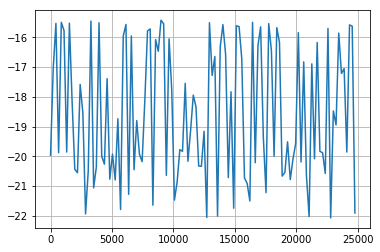

In [24]:
plt.plot(FREQ, DB)
plt.grid()
plt.show()

In [ ]:
# code validation

In [ ]:
def FFT(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 32:  # this cutoff should be optimized
        return DFT_slow(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N / 2] * X_odd,
                               X_even + factor[N / 2:] * X_odd])

In [ ]:
T_test = 10  # Duration in seconds
f0_test = 100  # Fundamental frequency
Fs_test = 100000  # Sampling frequency

# Time domain signal
t_test = np.arange(0, T_test*Fs_test)/Fs_test
x_test = np.sin(2*np.pi*f0_test*t_test)
N_test = x_test.size

# DFT
X_test = np.fft.fft(x_test)
X_db_test = 20*np.log10(2*np.abs(X_test)/N_test)
#f = np.fft.fftfreq(N, 1/Fs)
f_test = np.arange(0, N_test)*Fs_test/N_test

plt.plot(f_test, X_db_test)
plt.grid()
plt.show()

In [ ]:
t_test

In [ ]:
x_test

In [ ]:
X_test